In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Data Visulization and Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting Data from Google Drive
import os
from google.colab import drive

import pickle as pk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [45]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import os
os.chdir('/content/drive/My Drive/Projects/untitled')
from dump import calculate_accuracy

df = pd.read_csv("/content/drive/My Drive/Projects/untitled/Corona-Data.csv")
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 6 Text major ticklabel objects>)

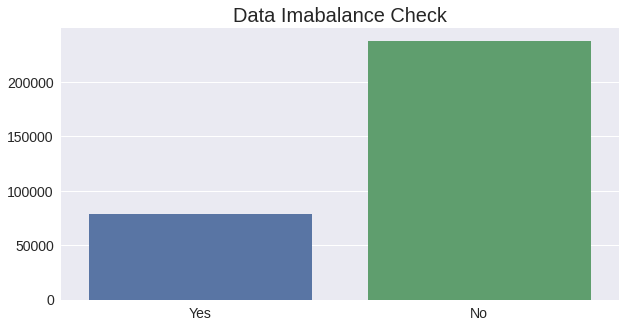

In [87]:
data = [(df['Severity_None']==1).sum(), (df['Severity_None']==0).sum()]
labels = ['Yes', 'No']
plt.style.use('seaborn')

plt.figure(figsize = (10,5))
sns.barplot(y = data, x = labels)
plt.title("Data Imabalance Check", fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [88]:
data

[79200, 237600]

Feature Engineering

Removing Irrelevent Columns

In [89]:
# irrelevent columns of data
cols = ['None_Sympton', 'None_Experiencing', 'Gender_Transgender', 'Severity_None', 'Contact_Dont-Know', 'Country']
df.drop(cols, axis = 1, inplace = True)

In [90]:
names = df.columns[:-1]
counts = []

for i in names:
    counts.append((df[i] == 1).sum())

counts

[99000,
 158400,
 178200,
 158400,
 99000,
 115200,
 172800,
 172800,
 115200,
 63360,
 63360,
 63360,
 63360,
 63360,
 105600,
 105600,
 79200,
 79200,
 79200,
 105600]

In [91]:
df.shape

(316800, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

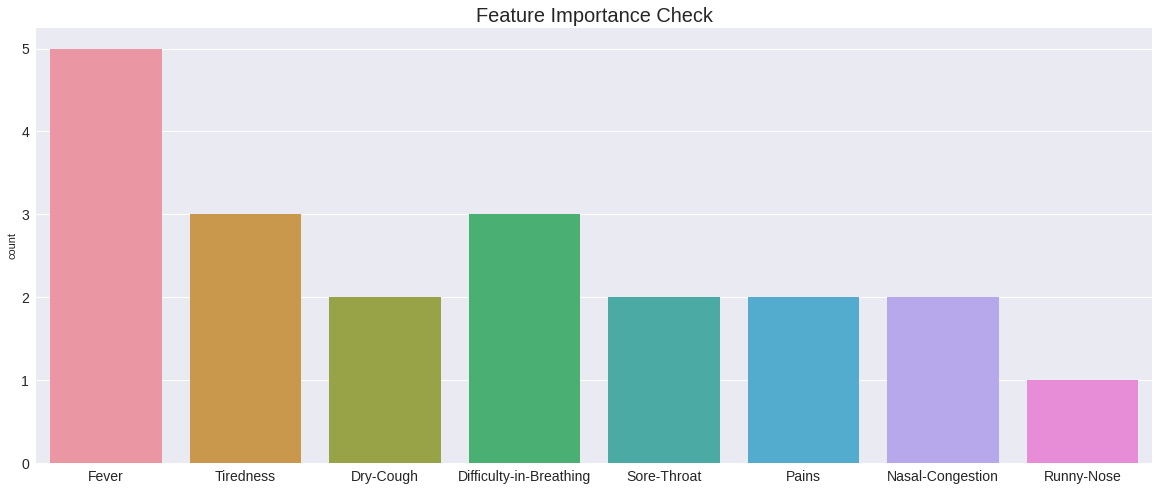

In [92]:

import seaborn as sns
plt.style.use('seaborn')

names = df.columns

plt.figure(figsize=(20, 8))
symptom_plot = sns.countplot(counts)
symptom_plot.set(xticklabels = names)
plt.title("Symptoms in most of the cases")
#plt.savefig("Symtompsinmostcases.pdf")
plt.title("Feature Importance Check", fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#Model Building

We have tried 4 different models


1.   Logistic Regression
2.   Naive Bayes
3.   Random Forest Classifier
4.   Artificial Neural Network



Logistic Regression Classifier

In [52]:
#LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#df=pd.read_csv("/content/drive/My Drive/Projects/untitled/Corona-Data.csv")
x = df.drop(['Severity_Mild',	'Severity_Moderate',	'Severity_Severe'], axis = 1).values

y_mild = df[['Severity_Mild']].values
y_moderate = df[['Severity_Moderate']].values
#y_none = df[['Severity_Mild',	'Severity_Moderate',	'Severity_None',	'Severity_Severe']].values
y_severe = df[['Severity_Severe']].values

y_comb = [(y_mild, 'mild'), (y_moderate, 'moderate'), (y_severe, 'severe')]

for y,label in  y_comb: 

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)

    from imblearn.over_sampling import SMOTE

    smt = SMOTE()
    x_train1,y_train1 = smt.fit_resample(x_train,y_train)

    #Create a Logistic Regression Classifier
    classifier_logistic = LogisticRegression()

    #Train the model using the training sets
    classifier_logistic.fit(x_train1,y_train1)

    #Predict the response for test dataset
    y_pred=classifier_logistic.predict(x_test)
    y_pred

    from sklearn.metrics import confusion_matrix
    cm_mild = confusion_matrix(y_test,y_pred)
    cm_mild; accuracies = []
    from sklearn.metrics import accuracy_score as calcutale_accuracy
    print('Accuracy {} : {}'.format(label,calculate_accuracy(y_test,y_pred)))
    accuracies.append(calculate_accuracy(y_test,y_pred))

print('\nFinale Accuracy : ', np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy mild : 0.8421826950316442


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy moderate : 0.8051827614136843


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy severe : 0.8594508606813043


Naive Bayes Classifier

In [53]:
#naive_bayes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

#df=pd.read_csv("/content/drive/My Drive/Projects/untitled/Corona-Data.csv")
x = df.drop(['Severity_Mild',	'Severity_Moderate',	'Severity_Severe'], axis = 1).values

y_mild = df[['Severity_Mild']].values
y_moderate = df[['Severity_Moderate']].values
#y_none = df[['Severity_None']].values
y_severe = df[['Severity_Severe']].values

y_comb = [(y_mild, 'mild'), (y_moderate, 'moderate'), (y_severe, 'severe')]

for y,label in  y_comb: 
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)

    from imblearn.over_sampling import SMOTE

    smt = SMOTE()
    x_train1,y_train1 = smt.fit_resample(x_train,y_train)


    #Create a Gaussian Classifier
    classifier_naive = GaussianNB()

    #Train the model using the training sets
    classifier_naive.fit(x_train1, y_train1)

    #Predict the response for test dataset
    y_pred = classifier_naive.predict(x_test)
    y_pred

    from sklearn.metrics import confusion_matrix
    cm_mild = confusion_matrix(y_test,y_pred)
    cm_mild; accuracies = []
    from sklearn.metrics import accuracy_score as calcutale_accuracy
    print('Accuracy {} : {}'.format(label,calculate_accuracy(y_test,y_pred)))
    accuracies.append(calculate_accuracy(y_test,y_pred))

print('\nFinale Accuracy : ', np.mean(accuracies))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy mild : 0.8777786234871818


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy moderate : 0.8745087745967444


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy severe : 0.8576197762180026


Random Forest Classifier

In [55]:
#RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#df=pd.read_csv("/content/drive/My Drive/Projects/untitled/Corona-Data.csv")
x = df.drop(['Severity_Mild',	'Severity_Moderate',	'Severity_Severe'], axis = 1).values

y_mild = df[['Severity_Mild']].values
y_moderate = df[['Severity_Moderate']].values
#y_none = df[['Severity_None']].values
y_severe = df[['Severity_Severe']].values

y_comb = [(y_mild, 'mild'), (y_moderate, 'moderate'), (y_severe, 'severe')]

for y,label in  y_comb: 
    
    x_train,x_test,y_train,y_test = train_test_split(x,y.ravel(),test_size=.25,random_state=0)

    from imblearn.over_sampling import SMOTE

    smt = SMOTE()
    x_train1,y_train1 = smt.fit_resample(x_train,y_train)


    #Create a Random Forest Classifier
    classifier_rf =  RandomForestClassifier(n_estimators=10)

    #Train the model using the training sets
    classifier_rf.fit(x_train1,y_train1)

    #Predict The response of Test Data
    y_pred=classifier_rf.predict(x_test)
    y_pred

    from sklearn.metrics import confusion_matrix
    cm_mild = confusion_matrix(y_test,y_pred)
    cm_mild; accuracies = []
    from sklearn.metrics import accuracy_score as calcutale_accuracy
    print('Accuracy {} : {}'.format(label,calculate_accuracy(y_test,y_pred)))
    accuracies.append(calculate_accuracy(y_test,y_pred))

print('\nFinale Accuracy : ', np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy mild : 0.7962358437518019


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy moderate : 0.803079395940229


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy severe : 0.8115249534218891

Finale Accuracy :  0.8231623068667526


Saving The Model Results for Future Use

In [ ]:
#opening the model file in picke format to 
#save so that it can be used in future case

#path for directory
path = '/content/drive/My Drive/Projects/unititled/Model_file.pkl'

models = [classifier_logistic, classifier_naive, classifier_rf]

with open(path,'wb+') as ff: # file opening in write binary plus mode(for autocreation)
    pk.dump(models, ff) #saving the model file in drive folder